In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as pdweb
import datetime

In [2]:
prices = pdweb.DataReader(['CVX','XOM','BP'], 'robinhood',
                               start=datetime.datetime(2010, 1, 1),
                               end=datetime.datetime(2013, 1, 1)).unstack(0)['close_price'].astype('float64')

# 出来高（何株売買されたか）のデータ
volume = pdweb.DataReader(['CVX','XOM','BP'], 'robinhood',
                               start=datetime.datetime(2010, 1, 1),
                               end=datetime.datetime(2013, 1, 1)).unstack(0)['volume'].astype('float64')

In [3]:
prices.head()

symbol,BP,CVX,XOM
begins_at,,,
2017-08-29,32.4866,103.8957,73.4720
2017-08-30,32.4866,103.7704,73.1356
2017-08-31,32.8268,103.6645,73.3567
2017-09-01,32.8646,104.7626,73.5873
2017-09-05,33.0348,105.4176,74.1736


In [5]:
# 株価の変化の割合
rets = prices.pct_change()
rets.head()

symbol,BP,CVX,XOM
begins_at,,,
2017-08-29,NaN,NaN,NaN
2017-08-30,0.000000,-0.001206,-0.004579
2017-08-31,0.010472,-0.001021,0.003023
2017-09-01,0.001151,0.010593,0.003144
2017-09-05,0.005179,0.006252,0.007967


In [6]:
%matplotlib inline

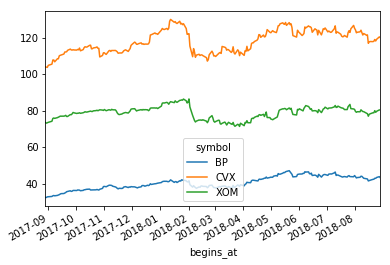

In [7]:
prices.plot()

In [8]:
# 相関
rets.corr()

symbol,BP,CVX,XOM
symbol,,,
BP,1.000000,0.704383,0.695175
CVX,0.704383,1.000000,0.667594
XOM,0.695175,0.667594,1.000000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

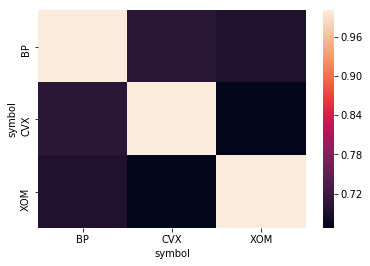

In [11]:
sns.heatmap(rets.corr())